In [ ]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


C:\Users\newusername\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [ ]:
df_train  = pd.read_csv("tabular-playground-series-feb-2022/train.csv", dtype={'target': 'category'}, index_col='row_id')

In [ ]:
df_train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [ ]:
X = df_train.drop(columns = ['target','row_id'])
X.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [ ]:
# Encoding categorical features
le = LabelEncoder()

y = pd.DataFrame(le.fit_transform(df_train['target']), columns=['target'])
y = y.target
y.head()

0    9
1    6
2    6
3    6
4    2
Name: target, dtype: int32

In [ ]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(160000, 286)
(160000,)
(40000, 286)
(40000,)


# Artificial Neural Networks (ANN) SciKitLearn

In [ ]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.
# batch_sizeint: Size of minibatches for stochastic optimizers.
# verbosebool: Whether to print progress
# tol: Tolerance for the optimization. When the loss/score is not improving by at least tol in consecutive iterations. 

# 1 Hidden Layer with 3 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [ ]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 1.29662931
Iteration 2, loss = 0.99242164
Iteration 3, loss = 0.89743887
Iteration 4, loss = 0.86414650
Iteration 5, loss = 0.84874283
Iteration 6, loss = 0.83719575
Iteration 7, loss = 0.81729461
Iteration 8, loss = 0.80267437
Iteration 9, loss = 0.79513060
Iteration 10, loss = 0.78846234
Iteration 11, loss = 0.78296249
Iteration 12, loss = 0.78103027
Iteration 13, loss = 0.77660992
Iteration 14, loss = 0.77394057
Iteration 15, loss = 0.77099627
Iteration 16, loss = 0.76912021
Iteration 17, loss = 0.76692461
Iteration 18, loss = 0.76538350
Iteration 19, loss = 0.76382696
Iteration 20, loss = 0.76159320
Iteration 21, loss = 0.76030453
Iteration 22, loss = 0.75975415
Iteration 23, loss = 0.75755553
Iteration 24, loss = 0.75726117
Iteration 25, loss = 0.75565508
Iteration 26, loss = 0.75649507
Iteration 27, loss = 0.75475329
Iteration 28, loss = 0.75499802
Iteration 29, loss = 0.75444447
Iteration 30, loss = 0.75412006
Iteration 31, loss = 0.75343451
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3,),
              learning_rate_init=0.1, random_state=1, verbose=True)

In [ ]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-2.67347864e-01, -2.80284743e+01,  3.21484879e+01],
       [-8.85461720e+00,  7.99076388e+00, -2.04215941e+01],
       [-3.01873778e+01, -5.84291680e+01, -8.89216124e+00],
       [-7.17429431e+01, -4.48666147e+01, -2.99317366e+01],
       [-9.37148225e+01,  7.27950358e+00, -3.16546371e+01],
       [-9.97463260e+01, -1.26019130e+01, -4.70614824e+01],
       [-9.58161371e+01, -2.06980165e+01, -3.91542131e+01],
       [-6.06163823e+01, -4.15046530e+01, -1.65382634e+01],
       [-1.41535519e+01,  7.51443472e+00, -2.63411864e+01],
       [-2.67931851e-01,  6.64281922e-01, -5.67564820e+00],
       [-1.25930893e-01, -1.33264588e+00,  1.59779512e+00],
       [ 5.63015418e+01,  6.85560231e+01, -8.22258320e+01],
       [ 1.05188397e+01, -3.40307010e+01, -4.59578912e+01],
       [-8.39413175e+01,  1.46464170e+01, -2.73321099e+01],
       [-1.89293985e+02, -3.60997939e+01, -1.08624978e+01],
       [-1.21872158e+02, -2.23256077e+01, -1.78686067e+01],
       [-1.40649312e+02, -2.48244653e+0

In [ ]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)


[7 0 6 ... 2 4 7]


In [ ]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)



 accuracy:  0.77115


In [ ]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[7 0 6 ... 2 4 7] 

[[4.34067723e-02 2.91809774e-01 1.18670776e-01 ... 3.60686566e-01
  4.08757255e-02 9.85535470e-02]
 [3.38162902e-01 3.02223609e-02 1.10962348e-01 ... 2.97554880e-02
  1.22249225e-01 8.69174057e-02]
 [1.64091310e-07 4.64693742e-07 5.91078668e-08 ... 8.48584417e-08
  7.14218921e-09 9.98507454e-09]
 ...
 [1.73035091e-01 6.76333762e-02 3.97762757e-01 ... 3.91966889e-02
  1.22178158e-01 1.98855387e-01]
 [1.35624403e-03 3.23004845e-03 1.31951234e-03 ... 1.56599232e-04
  3.76404770e-05 7.72288955e-05]
 [3.92864455e-13 2.26876381e-02 4.94351523e-04 ... 9.71976307e-01
  3.02293754e-07 4.84140083e-03]]


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.         0.         ... 0.99983324 0.99988883 1.        ]




[0.00000000e+00 2.48756219e-04 7.46268657e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [ ]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9907654888426127


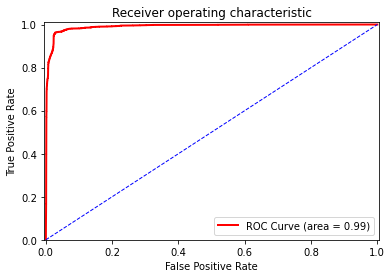

In [ ]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Cross-Validation

In [ ]:
X = df_train.drop(columns = ['target','row_id'])
X.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07


In [ ]:
# Encoding categorical features
le = LabelEncoder()

y = pd.DataFrame(le.fit_transform(df_train['target']), columns=['target'])
y = y.target
y.head()

0    9
1    6
2    6
3    6
4    2
Name: target, dtype: int32

In [ ]:
# Applying 10-fold cross validation with ANN classifier:

my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# CV:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

print('\n\n','accuracy: ',accuracy_list)

Iteration 1, loss = 1.23456532
Iteration 2, loss = 0.89356837
Iteration 3, loss = 0.83330208
Iteration 4, loss = 0.80706129
Iteration 5, loss = 0.79320241
Iteration 6, loss = 0.78525173
Iteration 7, loss = 0.77905436
Iteration 8, loss = 0.77472594
Iteration 9, loss = 0.77229970
Iteration 10, loss = 0.76941051
Iteration 11, loss = 0.76521326
Iteration 12, loss = 0.76411527
Iteration 13, loss = 0.76119727
Iteration 14, loss = 0.76015532
Iteration 15, loss = 0.75761657
Iteration 16, loss = 0.75719090
Iteration 17, loss = 0.75618759
Iteration 18, loss = 0.75579349
Iteration 19, loss = 0.75369965
Iteration 20, loss = 0.75327675
Iteration 21, loss = 0.75377125
Iteration 22, loss = 0.75111344
Iteration 23, loss = 0.75256665
Iteration 24, loss = 0.75066181
Iteration 25, loss = 0.75011642
Iteration 26, loss = 0.74927622
Iteration 27, loss = 0.74663985
Iteration 28, loss = 0.74794803
Iteration 29, loss = 0.74745765
Iteration 30, loss = 0.74539360
Iteration 31, loss = 0.74596625
Iteration 32, los

Iteration 23, loss = 0.75458434
Iteration 24, loss = 0.75173615
Iteration 25, loss = 0.75100863
Iteration 26, loss = 0.75090224
Iteration 27, loss = 0.74937165
Iteration 28, loss = 0.74863059
Iteration 29, loss = 0.74872582
Iteration 30, loss = 0.74677837
Iteration 31, loss = 0.74655690
Iteration 32, loss = 0.74619047
Iteration 33, loss = 0.74472229
Iteration 34, loss = 0.74676111
Iteration 35, loss = 0.74348048
Iteration 36, loss = 0.74631285
Iteration 37, loss = 0.74310926
Iteration 38, loss = 0.74319701
Iteration 39, loss = 0.74322022
Iteration 40, loss = 0.74314685
Iteration 41, loss = 0.74309648
Iteration 42, loss = 0.74353465
Iteration 43, loss = 0.74089463
Iteration 44, loss = 0.74052850
Iteration 45, loss = 0.74155938
Iteration 46, loss = 0.74078301
Iteration 47, loss = 0.73997698
Iteration 48, loss = 0.73954862
Iteration 49, loss = 0.74043967
Iteration 50, loss = 0.73878855
Iteration 51, loss = 0.73939634
Iteration 52, loss = 0.73791715
Iteration 53, loss = 0.73909839
Iteratio

Iteration 131, loss = 0.72836190
Iteration 132, loss = 0.72927415
Iteration 133, loss = 0.72723211
Iteration 134, loss = 0.72921624
Iteration 135, loss = 0.72666557
Iteration 136, loss = 0.72701655
Iteration 137, loss = 0.72816838
Iteration 138, loss = 0.72757803
Iteration 139, loss = 0.72672947
Iteration 140, loss = 0.72798810
Iteration 141, loss = 0.72892921
Iteration 142, loss = 0.72806534
Iteration 143, loss = 0.72721037
Iteration 144, loss = 0.72762632
Iteration 145, loss = 0.72865262
Iteration 146, loss = 0.72668323
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.25290308
Iteration 2, loss = 0.98591020
Iteration 3, loss = 0.90812424
Iteration 4, loss = 0.87555046
Iteration 5, loss = 0.86319763
Iteration 6, loss = 0.85545830
Iteration 7, loss = 0.85176978
Iteration 8, loss = 0.84827293
Iteration 9, loss = 0.84746007
Iteration 10, loss = 0.84487249
Iteration 11, loss = 0.84244295
Iteration 12, loss = 0.84085678
Iterati

Iteration 79, loss = 0.72719101
Iteration 80, loss = 0.72483968
Iteration 81, loss = 0.72453620
Iteration 82, loss = 0.72378371
Iteration 83, loss = 0.72509500
Iteration 84, loss = 0.72704528
Iteration 85, loss = 0.72542808
Iteration 86, loss = 0.72536536
Iteration 87, loss = 0.72597237
Iteration 88, loss = 0.72476827
Iteration 89, loss = 0.72511165
Iteration 90, loss = 0.72583345
Iteration 91, loss = 0.72553823
Iteration 92, loss = 0.72483140
Iteration 93, loss = 0.72400398
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.18892436
Iteration 2, loss = 0.84388525
Iteration 3, loss = 0.80060450
Iteration 4, loss = 0.78460058
Iteration 5, loss = 0.77648444
Iteration 6, loss = 0.77100181
Iteration 7, loss = 0.76672459
Iteration 8, loss = 0.76408478
Iteration 9, loss = 0.76155056
Iteration 10, loss = 0.75911400
Iteration 11, loss = 0.75739642
Iteration 12, loss = 0.75634232
Iteration 13, loss = 0.75435163
Iteration 14, loss = 0.

Iteration 48, loss = 0.73500608
Iteration 49, loss = 0.73323408
Iteration 50, loss = 0.73403443
Iteration 51, loss = 0.73346108
Iteration 52, loss = 0.73349060
Iteration 53, loss = 0.73402092
Iteration 54, loss = 0.73346121
Iteration 55, loss = 0.73298334
Iteration 56, loss = 0.73257965
Iteration 57, loss = 0.73220311
Iteration 58, loss = 0.73148728
Iteration 59, loss = 0.73166969
Iteration 60, loss = 0.73144009
Iteration 61, loss = 0.72900056
Iteration 62, loss = 0.73091197
Iteration 63, loss = 0.73115400
Iteration 64, loss = 0.72773752
Iteration 65, loss = 0.72968785
Iteration 66, loss = 0.72970174
Iteration 67, loss = 0.72856717
Iteration 68, loss = 0.73008992
Iteration 69, loss = 0.72859221
Iteration 70, loss = 0.72946566
Iteration 71, loss = 0.72832753
Iteration 72, loss = 0.72715675
Iteration 73, loss = 0.72889167
Iteration 74, loss = 0.72764593
Iteration 75, loss = 0.72697454
Iteration 76, loss = 0.72661903
Iteration 77, loss = 0.72689491
Iteration 78, loss = 0.72662575
Iteratio

In [ ]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.792455


## Implement ANN with Keras

In [ ]:
from sklearn import preprocessing
# import some utilities to transform/preprocess our data:
from keras.utils import np_utils

# Encoding categorical features
le = LabelEncoder()

Using TensorFlow backend.
C:\Users\newusername\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\newusername\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\newusername\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\newusername\Anaconda3\lib\site-packages\tensorflow\py

In [ ]:
# "Sequential" models let us define a stack of neural network layers
from keras.models import Sequential

# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten

In [ ]:
X = df_train.iloc[:,:-1]
y = df_train['target']
y

row_id
0           Streptococcus_pyogenes
1              Salmonella_enterica
2              Salmonella_enterica
3              Salmonella_enterica
4               Enterococcus_hirae
                    ...           
199995         Salmonella_enterica
199996      Streptococcus_pyogenes
199997    Streptococcus_pneumoniae
199998       Staphylococcus_aureus
199999       Klebsiella_pneumoniae
Name: target, Length: 200000, dtype: category
Categories (10, object): ['Bacteroides_fragilis', 'Campylobacter_jejuni', 'Enterococcus_hirae', 'Escherichia_coli', ..., 'Salmonella_enterica', 'Staphylococcus_aureus', 'Streptococcus_pneumoniae', 'Streptococcus_pyogenes']

In [ ]:
y = pd.DataFrame(le.fit_transform(df_train['target']), columns=['target'])
y

,target
0,9
1,6
2,6
3,6
4,2
...,...
199995,6
199996,9
199997,8
199998,7


In [ ]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
# Declare Sequential model to build our network:
model = Sequential()

# Compiling
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

input_size = 286
hidden_neurons = 100
out_size = 10

## Designing the ANN Structure (with 784 inputs, 10 outputs and 100 neuron in a hidden layer):
# -----------------------------------------
# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: output layer:
model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
model.add(Activation('softmax')) # Activation


In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [ ]:
input_size = 286
hidden_neurons = 100
out_size = 10

## Designing the ANN Structure (with 784 inputs, 10 outputs and 100 neuron in a hidden layer):
# -----------------------------------------
# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
model.add(Dense(hidden_neurons, input_dim = input_size))  # Nuerons
model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: output layer:
model.add(Dense(out_size, input_dim = hidden_neurons))  # Nuerons
model.add(Activation('softmax')) # Activation

In [ ]:
#fitted_model = model.fit(X_train, y_train, batch_size=32, epochs=15, verbose=1)
fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=15, verbose=1)


# batch_size: Integer or None. Number of samples per gradient update. 
# epochs: Number of iterations over the entire x and y training data. 
# verbose: 0, 1, or 2. how to see the training progress. 0 = silent, 1 = progress bar, 2 = one line per epoch.
# validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. 
# You can add some callbacks to get a view on internal states and statistics of the model during training:
# https://keras.io/callbacks/     

Train on 107199 samples, validate on 52801 samples
Epoch 1/15
107199/107199 [==============================] - 14s 128us/step - loss: 1.8745 - acc: 0.2993 - val_loss: 1.5546 - val_acc: 0.4356
Epoch 2/15
107199/107199 [==============================] - 13s 123us/step - loss: 1.4078 - acc: 0.4890 - val_loss: 1.2911 - val_acc: 0.5176
Epoch 3/15
107199/107199 [==============================] - 13s 125us/step - loss: 1.2085 - acc: 0.5971 - val_loss: 1.1347 - val_acc: 0.6379
Epoch 4/15
107199/107199 [==============================] - 14s 126us/step - loss: 1.0795 - acc: 0.6669 - val_loss: 1.0266 - val_acc: 0.7019
Epoch 5/15
107199/107199 [==============================] - 14s 126us/step - loss: 0.9872 - acc: 0.7047 - val_loss: 0.9446 - val_acc: 0.7372
Epoch 6/15
107199/107199 [==============================] - 13s 120us/step - loss: 0.9179 - acc: 0.7236 - val_loss: 0.8872 - val_acc: 0.7365
Epoch 7/15
107199/107199 [==============================] - 13s 123us/step - loss: 0.8648 - acc: 0.7368

In [ ]:
# Prediction:
y_pridict = model.predict(X_test, verbose=1)
print (y_pridict.shape)
# Evaluation:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

40000/40000 [==============================] - 1s 27us/step
(40000, 10)
40000/40000 [==============================] - 1s 31us/step
The accuracy is:  0.776675


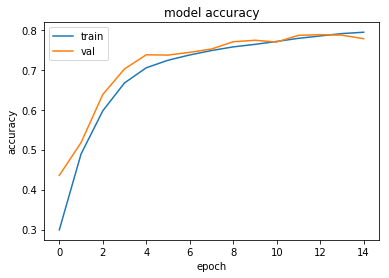

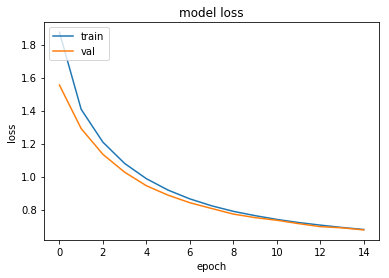

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# print(fitted_model.history)

# Logistic Regression

In [ ]:
# Importing libraries and packages:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df_train['target'])
X = df_train.drop(columns = ['row_id','target'])
print(y)

[9 6 6 ... 8 7 5]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(140000, 286)
(140000,)
(60000, 286)
(60000,)


In [ ]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 
my_logreg = LogisticRegression(max_iter = 2000)

In [ ]:
# Training ONLY on the training set:
my_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
# Testing on the testing set:
y_predict_lr = my_logreg.predict(X_test)
print(y_predict_lr)

[4 4 6 ... 3 5 1]


In [ ]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_lr = accuracy_score(y_test, y_predict_lr)

print('The accuracy is: ', score_lr)

The accuracy is:  0.6578166666666667


In [ ]:
# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)


In [ ]:
# This line prints the "actual label" of the testing set:
#print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_lr)

# This line prints the "estimated likelihood of both label" for the testing set:
#print(y_predict_prob_lr)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

[4 4 6 ... 3 5 1]
[0.04811246 0.02147274 0.01641672 ... 0.09135705 0.01602611 0.66146113]


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.         0.         ... 0.99992584 0.99998146 1.        ]




[0.00000000e+00 3.29706561e-04 8.24266403e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


In [ ]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9263825506235039


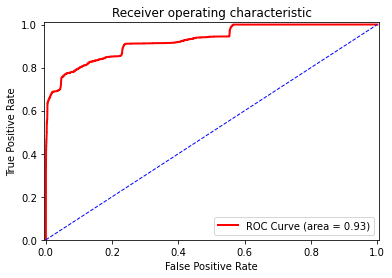

In [ ]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Logistic Regression with Cross Validation 

In [ ]:
# Applying 10-fold cross validation with "Logistic regression" classifier:

#In the following line, "my_cross_lr" is instantiated as an "object" of LogisticRegression "class".
my_cross_lr = LogisticRegression(max_iter = 2000)

# function cross_val_score performs Cross Validation:
accuracy_list = cross_val_score(my_cross_lr, X, y, cv = 10, scoring = 'accuracy')

accuracy_cv = accuracy_list.mean()

print('The accuracy is: ',accuracy_cv)

The accuracy is:  0.6757500000000001


We can see here that the accuracy without cross validation was 65.8%. While the accuracy with cross validation was 67.5%

## In summary the Keras ANN model with an AUC of 77% was the worst model. While the Logistic Regression model with an AUC of 93% did better. But, it was the SciKitLearn ANN model with an AUC of 99% that was the best model.